In [48]:
import pandas as pd 
import matplotlib.pyplot as plt

import os

In [49]:
df_list = []

data_path = '../Data/news-Data/'

for path in os.listdir(data_path):
    if path.split(".")[1] == 'csv' and path != 'nanContent.csv':
        df = pd.read_csv(data_path + path)
        df_list.append(df)

data = pd.concat(
    df_list, ignore_index=False
)
df = data.copy()
df = df.drop(columns=['Unnamed: 0'])

nan_df = df[df['Content'].isna()]
nan_df.to_csv('../Data/nanContent.csv', index=False)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212366 entries, 0 to 402
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Title                212366 non-null  object
 1   Content              141202 non-null  object
 2   Content_url          212366 non-null  object
 3   News_type            212365 non-null  object
 4   Day_month_year_hour  212366 non-null  object
 5   Img_url              212366 non-null  object
dtypes: object(6)
memory usage: 11.3+ MB


In [51]:
print(f"len df {len(df)}")
df = df.dropna()
df = df.drop_duplicates()
print(f"len dronna and drop_duplicates {len(df)}")

len df 212366
len dronna and drop_duplicates 133731


In [52]:
def split_date_to_year(day_month_year_hour):
    date = day_month_year_hour.split('-')[0]
    year = "20" + date.split('.')[2]
    return year

def split_date_to_month(day_month_year_hour):
    date = day_month_year_hour.split('-')[0]
    year = date.split('.')[1]
    return year

def split_date_to_day(day_month_year_hour):
    date = day_month_year_hour.split('-')[0]
    year = date.split('.')[0]
    return year

df['Yeary'] = df['Day_month_year_hour'].apply(split_date_to_year)
df['Month'] = df['Day_month_year_hour'].apply(split_date_to_month)
df['Day'] = df['Day_month_year_hour'].apply(split_date_to_day)

df = df.drop(columns=['Day_month_year_hour'])

In [71]:
def plot_type(data, explode):
    explodes = ([explode for i in range(len(set(data)))])
    value_counts = data.value_counts()
    labels = value_counts.index
    values = value_counts.values

    plt.pie(values, labels=labels, autopct='%1.f%%', explode=explodes)
    plt.show()

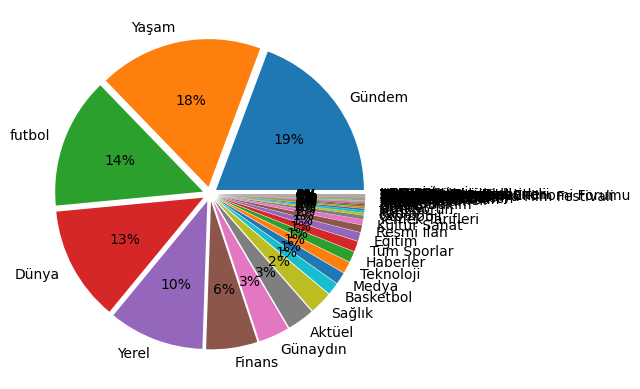

In [72]:
plot_type(df['News_type'], explode=0.05)

In [73]:
def categorize_news_type(news_type, types_list, return_type):
    if news_type in types_list:
        return return_type
    else:
        return news_type

In [74]:
with open("../Preprocess-Data/iller.txt", 'r', encoding='utf-8') as f:
    cities = f.readlines()

cities = [city.strip() for city in cities] + [
    'Kayseri Bölge', 'Karadeniz - Doğu Anadolu', 'Egeli Sabah', 'Marmara', 'Ankara Başkent', 'Akdeniz',
    'Güney'
    ]
    
df['News_type'] = df['News_type'].apply(categorize_news_type, types_list=cities, return_type='Yerel')

In [75]:
sports_teams = [
    "Beşiktaş", "Futbol", "Fenerbahçe",  "Galatasaray", "Trabzonspor", 'Türkiye Kupası', 'Euro 2020',
    'TFF 1. Lig', 'Spor Magazin', 'Transfer Haberleri'
]

df['News_type'] = df['News_type'].apply(categorize_news_type, types_list=sports_teams, return_type='futbol')

In [76]:
gloabl_list = ['Amerika', "Avrupa"]

df['News_type'] = df['News_type'].apply(categorize_news_type, types_list=gloabl_list, return_type='Dünya')

In [77]:
recipes_categories = [
    "Kahvaltılık Tarifler", "Çorbalar", "Sebze Yemekleri", "Vegan Tarifler", "Vejetaryen Tarifler",
    "Makarna Ve Pilav Tarifleri", "Yemek Tarifleri", "Kekler", "Salata ve Mezeler", 
    "Kurabiye Tarifleri", "Yemek", "Tatlılar", "Et Yemekleri", "Sağlıklı Tarifler",
    "Hamur İşi", 'Mutfak Sırları', 'İçecek Tarifleri', 'Tatlı Tarifleri', 'Börekler-Çörekler ve Poğaçalar',
    'Soslar ve İçecekler', 'Diğer Tarifler', 'Çorba Tarifleri', 'Pilav Tarifleri', 'Hamurişi Tarifleri',
    'Salata & Meze & Kanepe', 'Makarna Tarifleri', 'Bakliyat Yemekleri', 'Dolma-Sarma Tarifleri',
    'Sandviç Tarifleri', 'Aperatifler', 'Yumurta Yemekleri', 'Dünya Kupası', 'Diyet Yemekleri'
]

df['News_type'] = df['News_type'].apply(categorize_news_type, types_list=recipes_categories, return_type='Yemek Tarifleri')

In [78]:
health_topics = ["Sağlık", "Çocuk Sağlığı", "Ruh Sağlığı", "Kadın Sağlığı", "Erkek Sağlığı"]

df['News_type'] = df['News_type'].apply(categorize_news_type, types_list=health_topics, return_type='Sağlık')

In [79]:
personal_care_categories = [
    "Makyaj", "Saç Bakımı", "Cilt Bakımı", "Güzellik"
]

df['News_type'] = df['News_type'].apply(categorize_news_type, types_list=personal_care_categories, return_type="Kişisel Bakım")

In [80]:
finans_categories = [
    "Finans Kripto Para Haberleri", "Ekonomi", "Finans Şirket Haberleri", "Finans Altın Haberleri", 
    "Finans Emtia-Döviz Haberleri", "Finans Borsa Haberleri", "Finans Gündem Haberleri", "Finans Ekonomi Haberleri",
]

df['News_type'] = df['News_type'].apply(categorize_news_type, types_list=finans_categories, return_type="Finans")

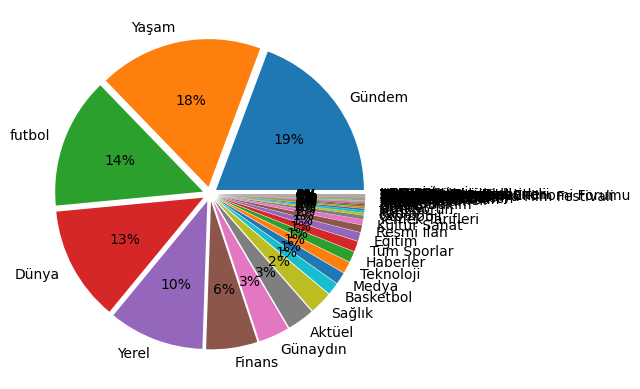

In [81]:
plot_type(df['News_type'], explode=0.05)

In [82]:
def show_news_types(index):
    return df['News_type'].value_counts()[index:index+20]

In [83]:
show_news_types(0)

Gündem             25820
Yaşam              23956
futbol             19105
Dünya              16755
Yerel              13948
Finans              7502
Günaydın            4533
Aktüel              3968
Sağlık              3301
Basketbol           1796
Medya               1720
Teknoloji           1688
Haberler            1571
Tüm Sporlar         1503
Eğitim              1270
Resmi İlan          1024
Kültür Sanat         788
Yemek Tarifleri      562
Otomobil             345
Kadın                341
Name: News_type, dtype: int64

In [84]:
show_news_types(20)

Turizm               251
Bize Sorun           226
Güncel               218
Çocuk                173
Kişisel Bakım        137
Hamilelik            104
Spor                  97
Bebek                 92
Pazar Sabah           86
Kamu Personeli        80
İLANLAR               72
Cumartesi Sabah       67
Ramazan               58
Ramazan Haberleri     48
Moda                  35
Magazin               35
Bebeğim ve Biz        30
Emniyet Personeli     30
Aile ve İlişkiler     28
Diyet                 23
Name: News_type, dtype: int64

In [85]:
show_news_types(40)

Beslenme                               22
Askeri Personel                        21
EMEKLİ                                 19
Oyun                                   18
Bölgeler                               18
Uluslararası Antalya Film Festivali    18
Kitap                                  17
İşte İnsan                             13
Sağlık Personeli                       13
Öğretmen                               13
Çocuklar İçin                          12
Elektrik Kesintisi                     11
Sözleşmeli Personel                    11
Teknokulis                             10
Keşfet                                 10
İlişkiler                              10
Temizlik                               10
Uluslararası Futbol Ekonomi Forumu      9
15 Temmuz İhaneti                       8
KPSS                                    8
Name: News_type, dtype: int64

In [86]:
show_news_types(60)

Rüya Tabirleri              7
Seçim                       7
Stil ve Öneri               6
Egzersizler                 6
Memurlar                    5
Dini Hizmetler Personeli    5
Güncel Memur Haberleri      4
Emlak                       4
Teknik Personel             4
Yeşil Ekran                 3
Bebekler İçin               3
Astroloji                   2
Aile                        2
Günün Duası                 2
Sürekli İşçi                2
Sinema                      2
Doğum                       1
Akademik Personel           1
Vodafone Business           1
Engelli Memur               1
Name: News_type, dtype: int64

In [87]:
show_news_types(80)

Hakim ve Savcı         1
Gezegen Hareketleri    1
Güzel Sözler           1
Haber                  1
Doğalgaz Kesintisi     1
Basın İlan Kurumu      1
Name: News_type, dtype: int64